Dataset Preview:
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  

Model Accuracy: 100.00%

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



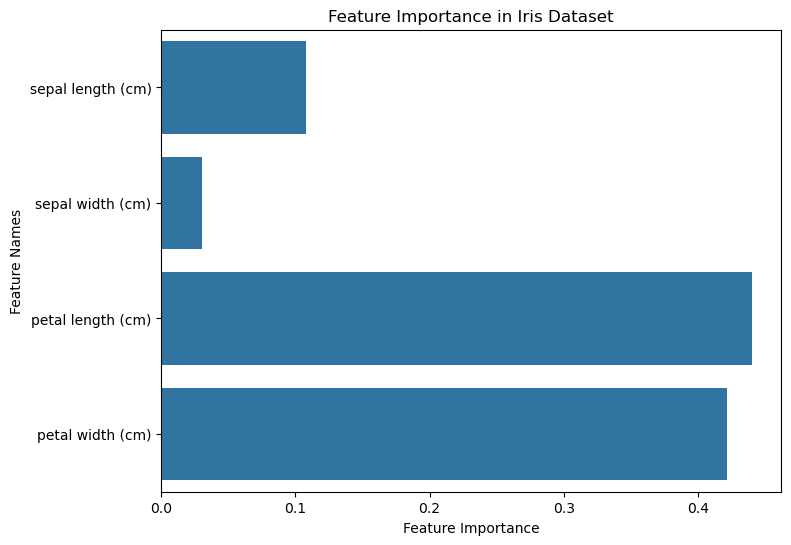

In [1]:
# Required Libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

def load_and_prepare_data():
    """Load the Iris dataset and prepare it for modeling."""
    iris = load_iris()
    data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
    data['species'] = iris.target
    data['species'] = data['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})
    return data, iris.feature_names

def train_random_forest(X_train, y_train):
    """Train a Random Forest Classifier."""
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)
    return model

def evaluate_model(model, X_test, y_test):
    """Evaluate the trained model and print results."""
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("\nModel Accuracy: {:.2f}%".format(accuracy * 100))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    return y_pred

def plot_feature_importance(model, feature_names):
    """Plot the feature importance from the Random Forest model."""
    importance = model.feature_importances_
    plt.figure(figsize=(8, 6))
    sns.barplot(x=importance, y=feature_names)
    plt.xlabel("Feature Importance")
    plt.ylabel("Feature Names")
    plt.title("Feature Importance in Iris Dataset")
    plt.show()

def main():
    # Step 1: Load and Prepare Data
    data, feature_names = load_and_prepare_data()
    print("Dataset Preview:\n", data.head())

    # Step 2: Split Data into Training and Testing Sets
    X = data[feature_names]
    y = data['species']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Step 3: Train the Model
    model = train_random_forest(X_train, y_train)

    # Step 4: Evaluate the Model
    evaluate_model(model, X_test, y_test)

    # Step 5: Visualize Feature Importance
    plot_feature_importance(model, feature_names)

if __name__ == "__main__":
    main()
